In [1]:
import json
import numpy as np

utterance_length = []

def make_data(data_path):
    global utterance_length
    with open(data_path, "r") as f:
        data = json.load(f)

    text_list = []
    def make_chat(inp):
        chat = ""
        for cvt in inp['conversation']:
            chat += cvt['utterance']
        return chat

    for example in data:
        total_chat = make_chat(example['input'])
        text_list.append(total_chat)
        utterance_length.append(len(total_chat))
    
    text = ' '.join(text_list)
    return text

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

FONT_PATH = "/mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/NanumSquareNeo-cBd.ttf"

def make_cloud(text, title, top_k, max_words=100):
    # plt.rc('font', family='NanumGothicCoding')
    wordcloud = WordCloud(font_path=FONT_PATH, max_words=max_words, background_color="white").generate(text)
    
    fig, axs = plt.subplots(2, 1, figsize=(15, 15))

    top_data = dict(list(wordcloud.words_.items())[:top_k])
    labels, values = zip(*top_data.items())

    # 막대 그래프 그리기
    axs[0].bar(labels, values)
    axs[0].set_xlabel('Labels')
    axs[0].set_ylabel('Values')
    axs[0].set_title(f"max count words on {title} data (top {top_k})", fontsize=36)


    # 두 번째 그래프: 워드클라우드
    axs[1].imshow(wordcloud)
    axs[1].axis('off')
    axs[1].set_title(f"max count words on {title} data (max words = {max_words})", fontsize=36)

    # 그래프 간격 조정
    plt.tight_layout()
    plt.show()

## 전처리 전 데이터

### dialog data

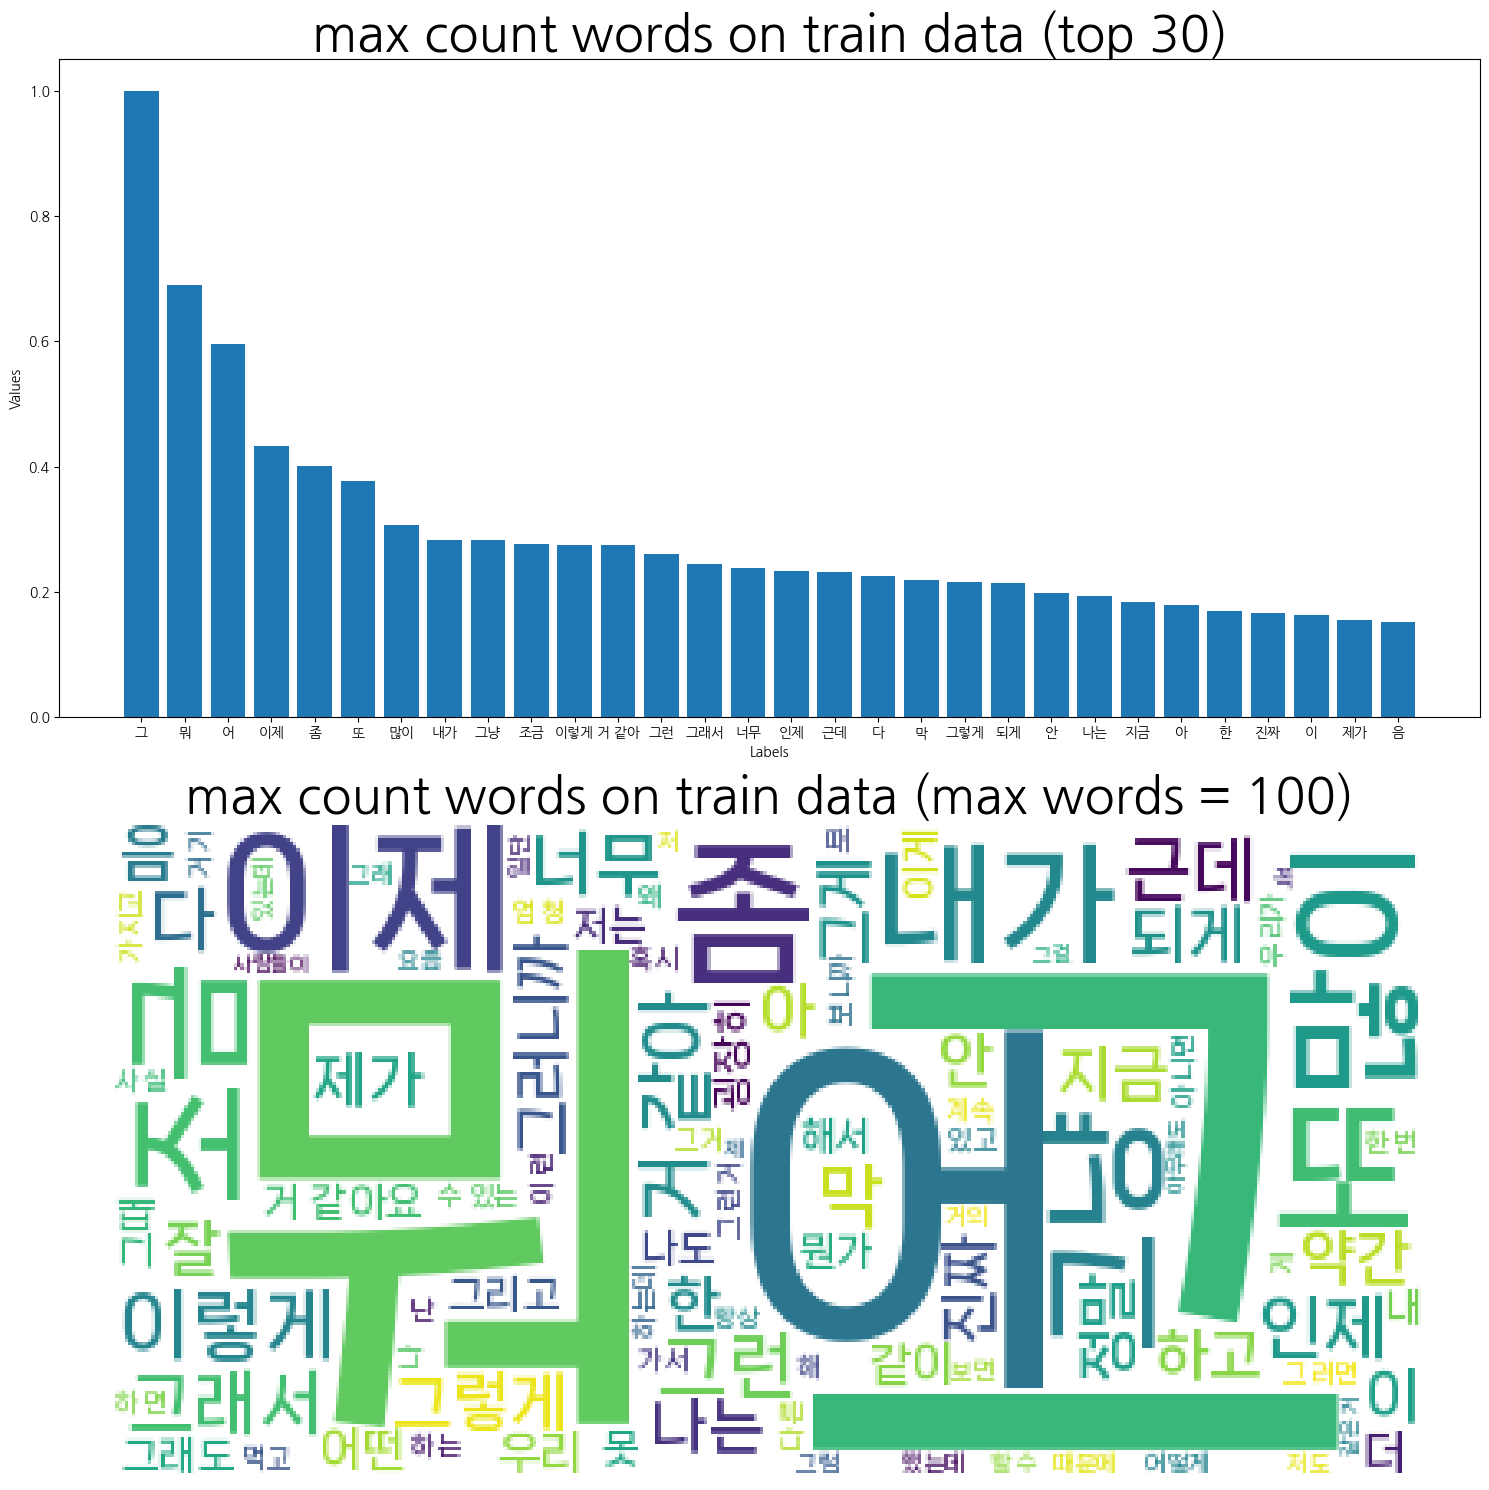

In [3]:
utterance_length = []
make_cloud(make_data("/mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/resource/data/train.json"), "train", 30)

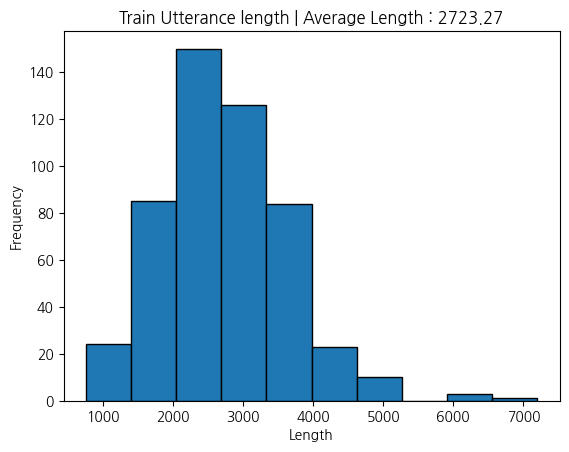

In [6]:
# 히스토그램 그리기
plt.hist(utterance_length, bins=10, edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title(f'Train Utterance length | Average Length : {np.array(utterance_length).mean():.2f}')
plt.show()

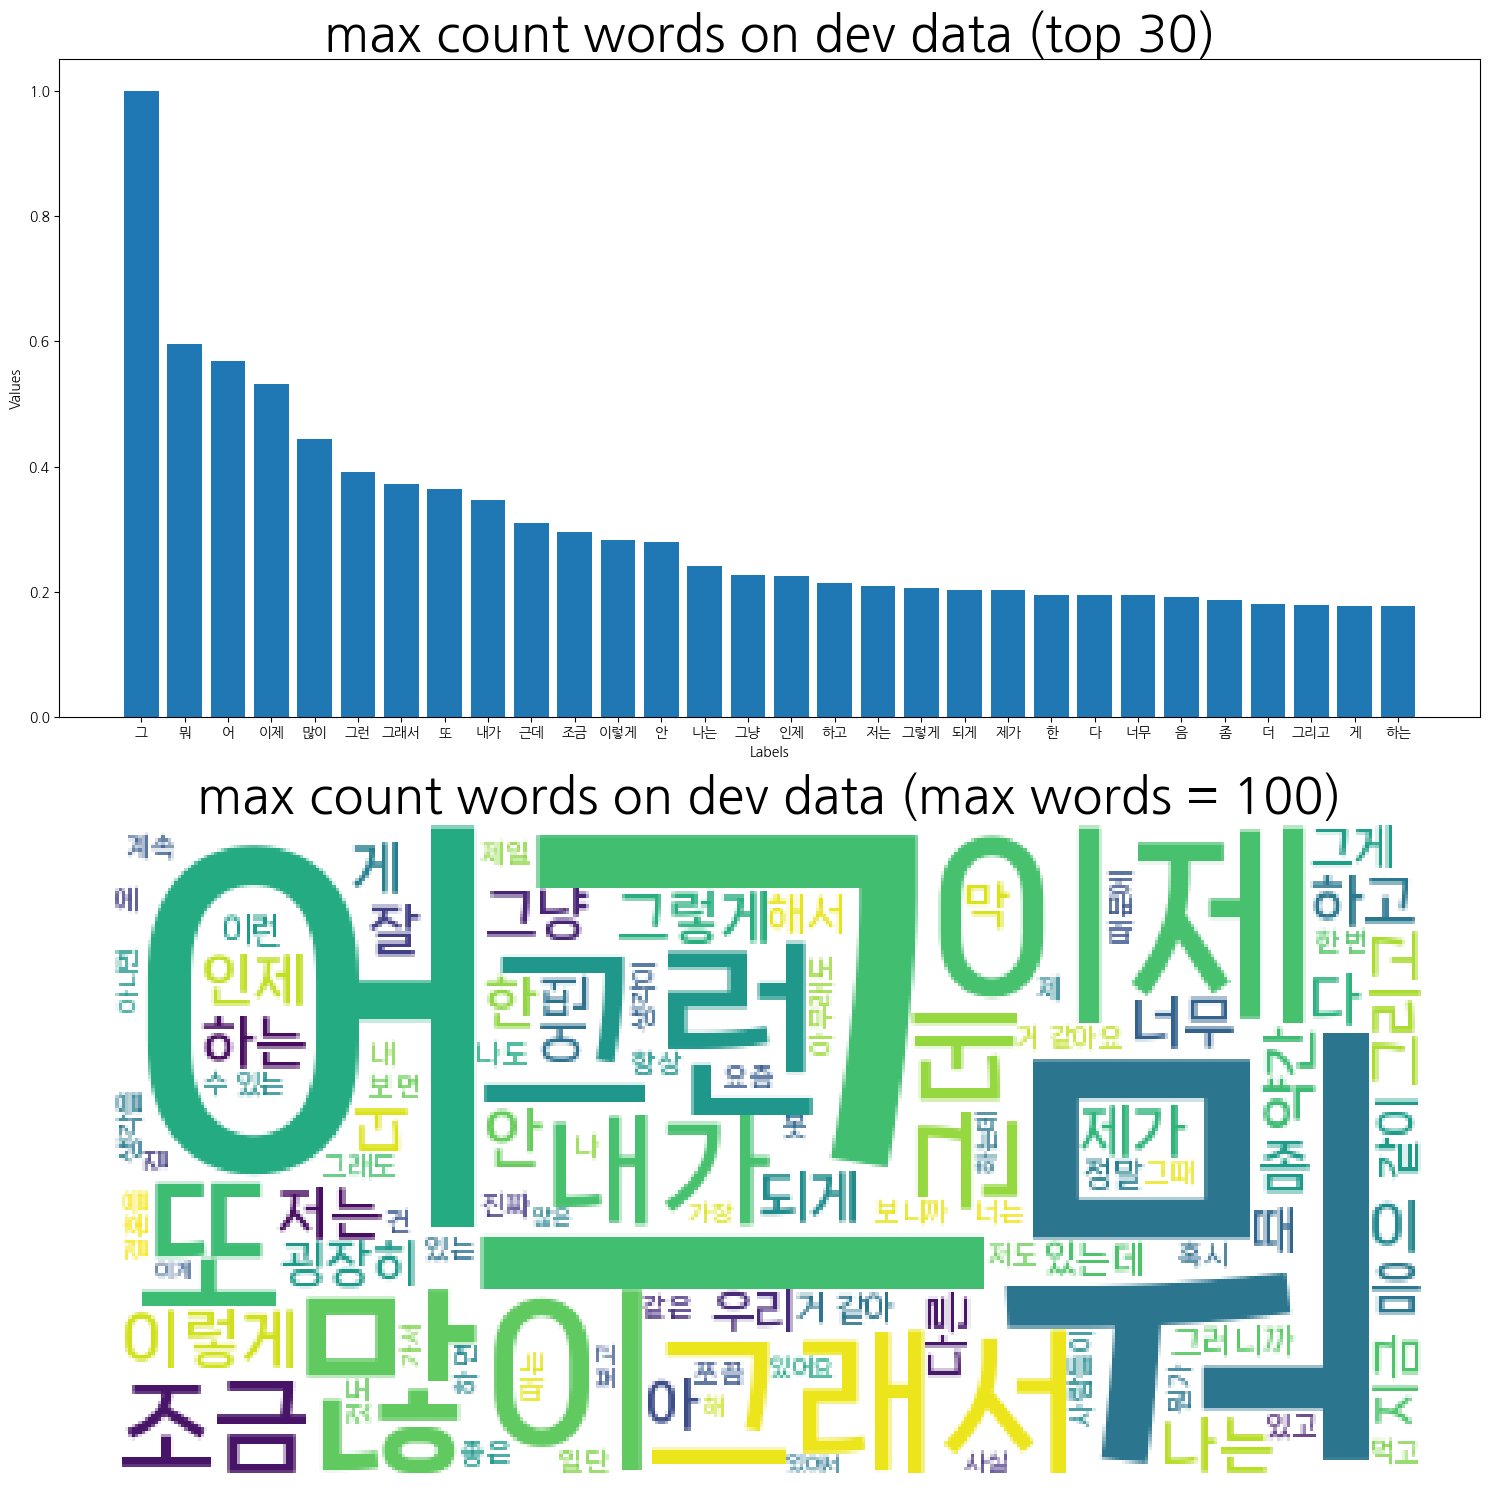

In [7]:
utterance_length = []
make_cloud(make_data("/mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/resource/data/dev.json"), "dev", 30)

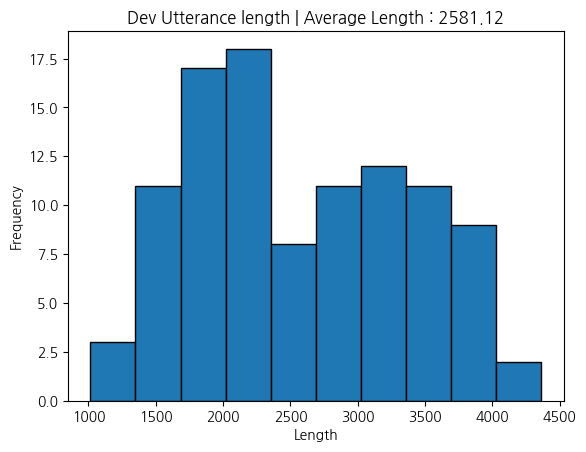

In [8]:
# 히스토그램 그리기
plt.hist(utterance_length, bins=10, edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title(f'Dev Utterance length | Average Length : {np.array(utterance_length).mean():.2f}')
plt.show()

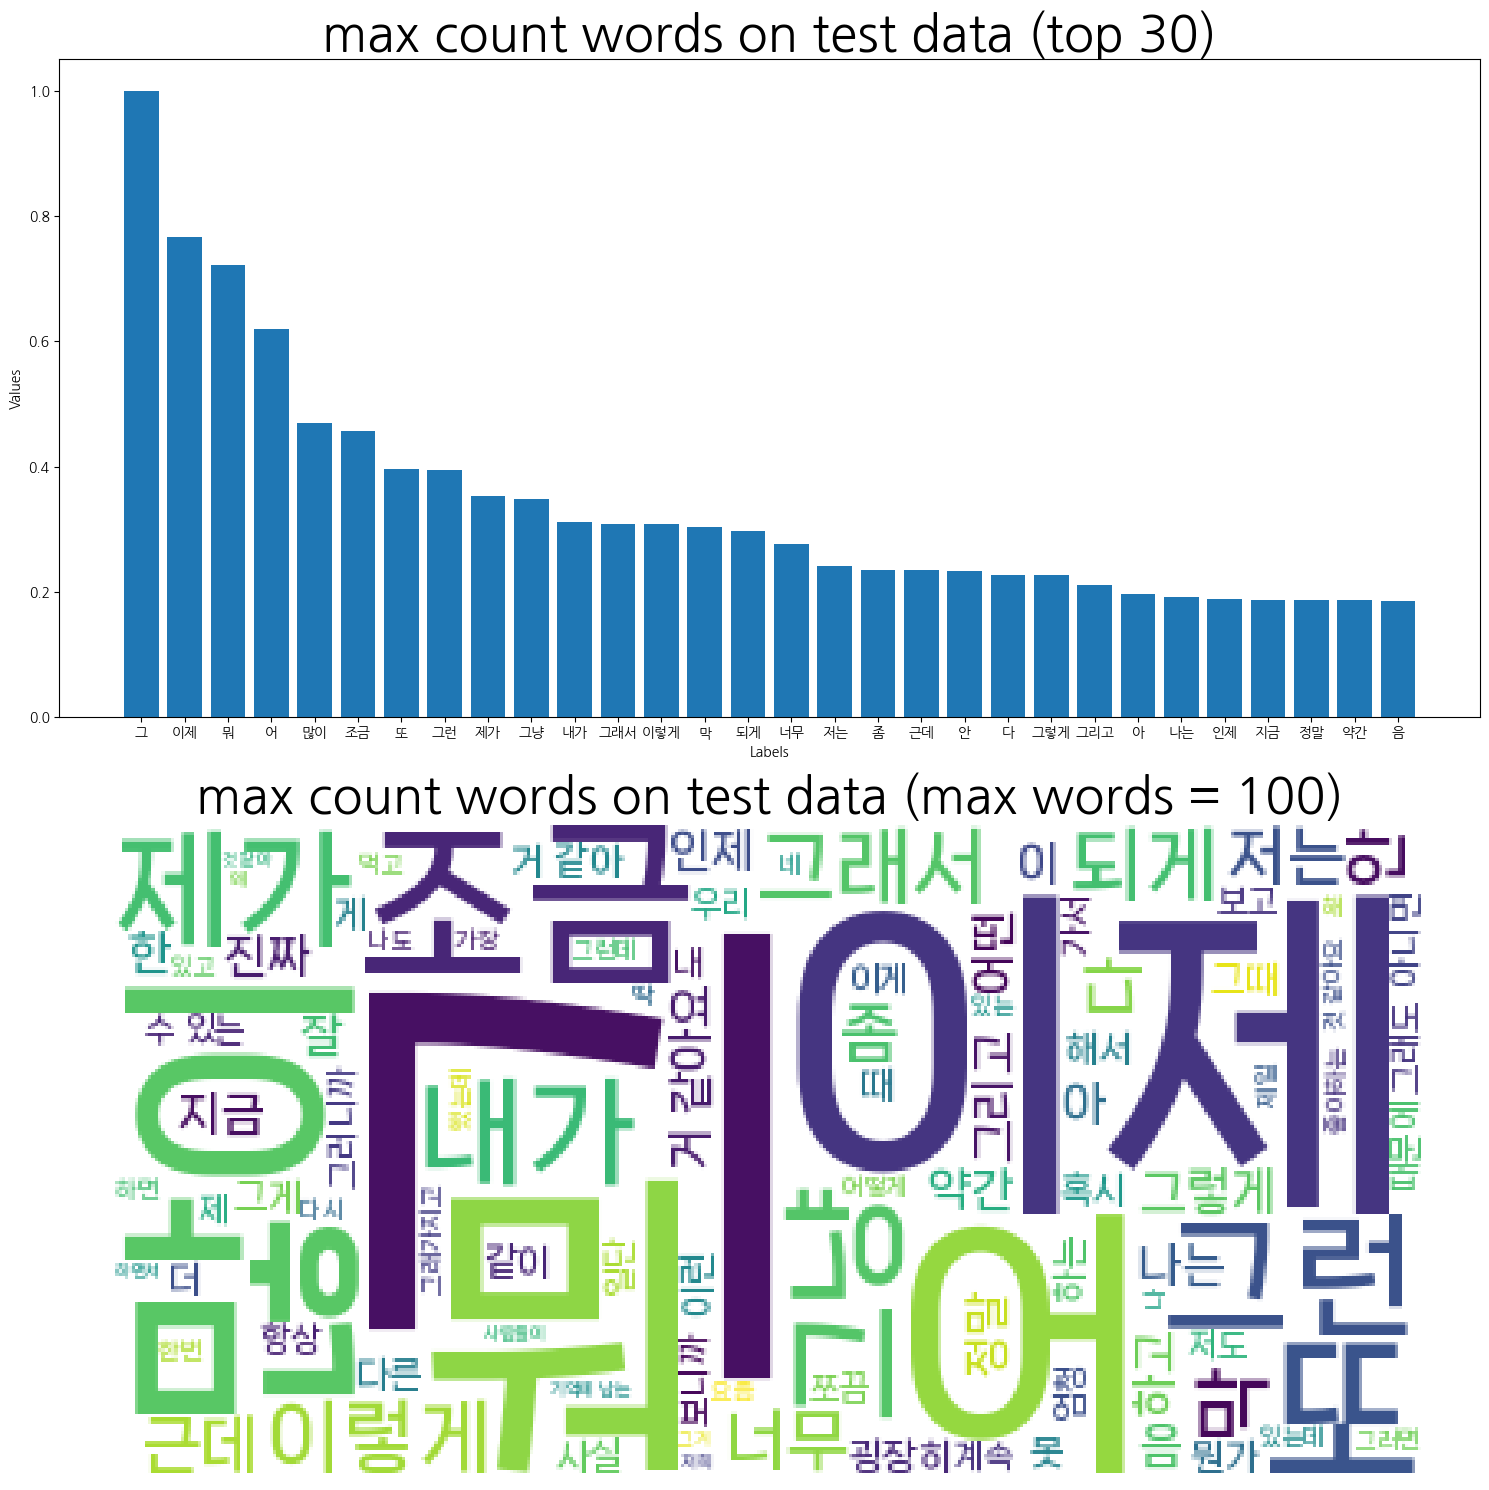

In [9]:
utterance_length = []
make_cloud(make_data("/mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/resource/data/test.json"), "test", 30)

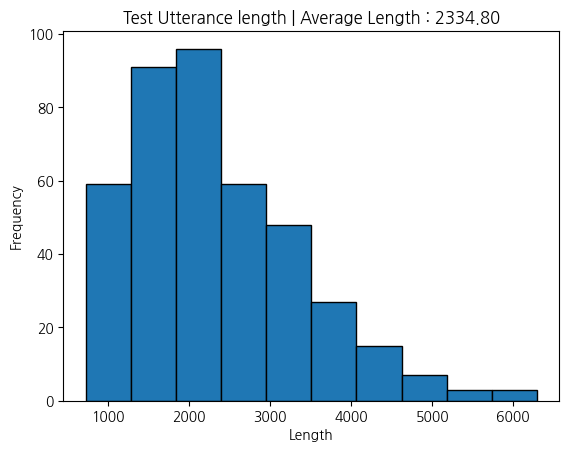

In [10]:
# 히스토그램 그리기
plt.hist(utterance_length, bins=10, edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title(f'Test Utterance length | Average Length : {np.array(utterance_length).mean():.2f}')
plt.show()

### label

In [ ]:
import json

def make_label(data_path):
    with open(data_path, "r") as f:
        data = json.load(f)

    text_list = []
    
    for example in data:
        text_list.append(example['output'])
    
    text = ' '.join(text_list)
    return text

In [ ]:
make_cloud(make_label("/mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/resource/data/train.json"), "train label", 20)

In [ ]:
make_cloud(make_label("/mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/resource/data/dev.json"), "dev label", 20)

## 형태소 분석

전처리 이후에 필요할 듯

In [ ]:
from konlpy.tag import Okt

okt = Okt()
print(okt.pos("그러면 음식을 먹을 때 하 꼭 한 읍 음식이 아니더라도 넣기 싫어하는 것이 있다면 그 이유와 또 음식을 먹을 때 안 먹는 것 이 있다면 혹시 그거라도 말해주시면 감사하겠습니다."))

## 한 글자

In [ ]:
import re

# 예시 텍스트
text = "그러면 음식을 먹을 때 하 꼭 한 읍 음식이 아니더라도 넣기 싫어하는 것이 있다면 그 이유와 또 음식을 먹을 때 안 먹는 것 이 있다면 혹시 그거라도 말해주시면 감사하겠습니다."

# 한 글자로 구성된 단어를 찾는 정규 표현식
pattern = r'\b\w\b'

# 정규 표현식을 사용하여 한 글자로 구성된 단어 찾기
one_letter_words = re.findall(pattern, text)

print(one_letter_words)

In [ ]:
import json

def make_one_letter_data(data_path):
    with open(data_path, "r") as f:
        data = json.load(f)

    text_list = []
    def make_chat(inp):
        chat = ""
        for cvt in inp['conversation']:
            chat += cvt['utterance']
        return chat

    for example in data:
        text_list += re.findall(r'\b\w\b', make_chat(example['input']))
    
    text = ' '.join(text_list)
    return text

In [ ]:
make_cloud(make_one_letter_data("/mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/resource/data/train.json"), "train", 50)

In [ ]:
import re

# 예시 텍스트
text = "훨씬 어떤 강아지나 개 같은 그런 류에 대해서 안즈 안전 의식이 없었을 때 그 그 당시에도 그런 식으로 많이 생각을 하게 됐어요."

# 정규표현식 패턴
pattern = r'\b(\w)\s+\1\b'

# 반복되는 글자를 하나로 대체
result = re.sub(pattern, r'\1', text)

print(result)

## 감탄사 (음~)

In [ ]:
import re

text = "음~ 아~ 이건 예시입니다."
# 한 글자 뒤에 '~'가 붙은 패턴을 찾아 제거합니다.
cleaned_text = re.sub(r'\w~', '', text).strip()

print(cleaned_text)  # 결과:  이건 예시입니다.

In [ ]:
import json

def make_exclamation_data(data_path):
    with open(data_path, "r") as f:
        data = json.load(f)

    text_list = []
    def make_chat(inp):
        chat = ""
        for cvt in inp['conversation']:
            chat += cvt['utterance']
        return chat

    for example in data:
        text_list += re.findall(r'\w~', make_chat(example['input']))
    
    text = ' '.join(text_list)
    return text

In [ ]:
make_cloud(make_exclamation_data("/mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/resource/data/train.json"), "train", 50)

# hanspell

In [ ]:
%cd /mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/py-hanspell

In [ ]:
import re
import requests

def get_passport_key():
    """네이버에서 '네이버 맞춤법 검사기' 페이지에서 passportKey를 획득

        - 네이버에서 '네이버 맞춤법 검사기'를 띄운 후 
        html에서 passportKey를 검색하면 값을 찾을 수 있다.

        - 찾은 값을 spell_checker.py 48 line에 적용한다.
    """

    url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=네이버+맞춤법+검사기"
    res = requests.get(url)

    html_text = res.text

    match = re.search(r'passportKey=([^&"}]+)', html_text)
    if match:
        passport_key = match.group(1)
        return passport_key
    else:
        return False


def fix_spell_checker_py_code(file_path, passportKey):
    print(passportKey)
    """획득한 passportkey를 spell_checker.py파일에 적용
    """
    
    pattern = r"'passportKey': '.*'"

    with open(file_path, 'r', encoding='utf-8') as input_file:
        content = input_file.read()
        modified_content = re.sub(pattern, f"'passportKey': '{passportKey}'", content)

    with open(file_path, 'w', encoding='utf-8') as output_file:
        output_file.write(modified_content)
    
    return 


# before run
spell_checker_file_path = './hanspell/spell_checker.py'

passport_key = get_passport_key()
if passport_key:
    fix_spell_checker_py_code(spell_checker_file_path, passport_key)
else:
    print("passportKey를 찾을 수 없습니다.")

In [ ]:
## Hanspell 작동 체크
from hanspell import spell_checker

result = spell_checker.check(u'나도 인제 안 미루고 맞아는 보려고. 맞아서 소용없으면 소용없는 거고 또 맞아서 좋을 수도 있는 거니까. 그래서 안 걸리면 더 좋은 거고. 가 한번 name3이가 얘기한 대로 혜택 받을 수 있으면 받아가지고 맞아보고.')
result

# 전처리 이후 데이터

네이버 맞춤법 검사기는 최대 300자 이내만 처리 가능

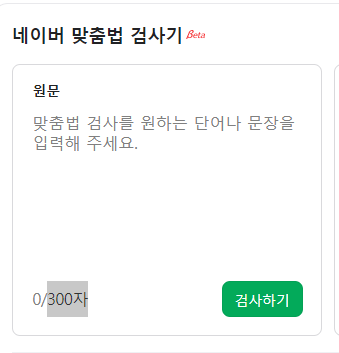

## hanspell 버전

In [ ]:
from hanspell import spell_checker
import re
import json


## Preprocess functions ##
def remove_empty_utterance(data:json):
    """
    Remove empty utterances from the data
    """
    for example in data:
        example['input']['conversation'] = [cvt for cvt in example['input']['conversation'] if cvt['utterance'] != '']
    return data


def correct_wrong_output(data:json):
    """
    Correct wrong speakers in outputs of train samples 'train-000401', 'train-000402'
    """
    data[400]['output'] = data[400]['output'].replace('SD2100504','SD2110504')
    data[401]['output'] = data[401]['output'].replace('SD2110503','SD2100503')

    return data


def file_preprocess(data:json):
    data = remove_empty_utterance(data)
    data = correct_wrong_output(data)

    return data


def spell_check(text):
    result = spell_checker.check(text)
    return result.checked


"""
불용어 처리
- name1, name2..
- 뒤에 물결이 붙는 경우 ("음~", "아~")
- 그, 뭐, 어, 인제, 막, 아, 음, 읍, 오, 으
- 한 글자가 두번 이상 반복되는 경우 ("또 또", "그 그")
- hanspell
"""

stopwords_pattern = [r'name[0-9]\S*', r'\w~', r'\b으\b', r'\b그\b', r'\b뭐\b', r'\b어\b',  r'\b인제\b', r'\b막\b', r'\b아\b', r'\b음\b', r'\b읍\b', r'\b오\b', r'\b으\b']

def remove_stopwords(text):
    for pattern in stopwords_pattern:
        text = re.sub(pattern, '', text)
    
    # 두 번 이상 반복되는 경우
    text = re.sub(r'\b(\w)\s+\1\b', r'\1', text)
    
    return text


# stopwords + 반복어구 제거
def text_preprocess(text):
    text = remove_stopwords(text)
    return text

In [ ]:
spell_check("아 외 않되는 거예여?")

In [ ]:
import json
import time
from tqdm import tqdm
import textwrap

def make_clean_data(data_path):
    with open(data_path, "r") as f:
        data = json.load(f)

    data = file_preprocess(data)
    
    text_list = []
    def make_chat(inp):
        chat = ""
        for idx, cvt in enumerate(inp['conversation']):
            if len(cvt['utterance']) <= 300:
                try:
                    time.sleep(0.5)
                    chat += spell_check(cvt['utterance'])
                except:
                    raise ValueError(f"{idx} 번째 문장에서 검사 불가, 문장 길이 : {len(cvt['utterance'])}\n문장 : {cvt['utterance']}")
            else:
                # 300자씩 split해서 검사하기
                split_texts = textwrap.wrap(cvt['utterance'], 300)
                cleaned_chat = ""

                for split_text in split_texts:
                    cleaned_chat += spell_check(split_text) + " "
                    time.sleep(0.5)
                
                chat += cleaned_chat.strip()

        chat = text_preprocess(chat)

        return chat

    for example in tqdm(data):
        text_list.append(make_chat(example['input']))
    
    text = ' '.join(text_list)
    return text

In [ ]:
cleaned_train_data = make_clean_data("/mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/resource/data/train.json")

## hanspell X 버전

In [11]:
import re
import json

## Preprocess functions ##
def remove_empty_utterance(data:json):
    """
    Remove empty utterances from the data
    """
    for example in data:
        example['input']['conversation'] = [cvt for cvt in example['input']['conversation'] if cvt['utterance'] != '']
    return data


def correct_wrong_output(data:json):
    """
    Correct wrong speakers in outputs of train samples 'train-000401', 'train-000402'
    """
    data[400]['output'] = data[400]['output'].replace('SD2100504','SD2110504')
    data[401]['output'] = data[401]['output'].replace('SD2110503','SD2100503')

    return data


def file_preprocess(data:json):
    data = remove_empty_utterance(data)
    data = correct_wrong_output(data)

    return data


"""
불용어 처리
- name1, name2..
- 뒤에 물결이 붙는 경우 ("음~", "아~")
- 그, 뭐, 어, 인제, 막, 아, 음, 읍, 오, 으, 이제
- 한 글자가 두번 이상 반복되는 경우 ("또 또", "그 그")
"""

stopwords_pattern = [r'name[0-9]\S*', r'\w~', r'\b으\b', r'\b그\b', r'\b뭐\b', r'\b어\b',  r'\b인제\b', r'\b이제\b', r'\b막\b', r'\b아\b', r'\b음\b', r'\b읍\b', r'\b오\b', r'\b으\b']

def remove_stopwords(text):
    for pattern in stopwords_pattern:
        text = re.sub(pattern, '', text)
    
    # 두 번 이상 반복되는 경우
    text = re.sub(r'\b(\w)\s+\1\b', r'\1', text)

    # 공백 두 번 이상 연속 -> 1개로
    text = re.sub(r'\s{2,}', ' ', text)
    
    return text


# stopwords + 반복어구 제거
def text_preprocess(text):
    text = remove_stopwords(text)
    return text

In [12]:
import json
from tqdm import tqdm

def make_clean_data(data_path, is_train=False):
    global utterance_length
    with open(data_path, "r") as f:
        data = json.load(f)

    if is_train == True:
        data = file_preprocess(data)
    
    text_list = []
    def make_chat(inp):
        chat = ""
        for cvt in inp['conversation']:
            chat += cvt['utterance'] + " "

        return text_preprocess(chat)

    for example in tqdm(data):
        total_chat = make_chat(example['input'])
        text_list.append(total_chat)
        utterance_length.append(len(total_chat))
    
    text = ' '.join(text_list)
    return text

100%|██████████| 506/506 [00:00<00:00, 1927.94it/s]


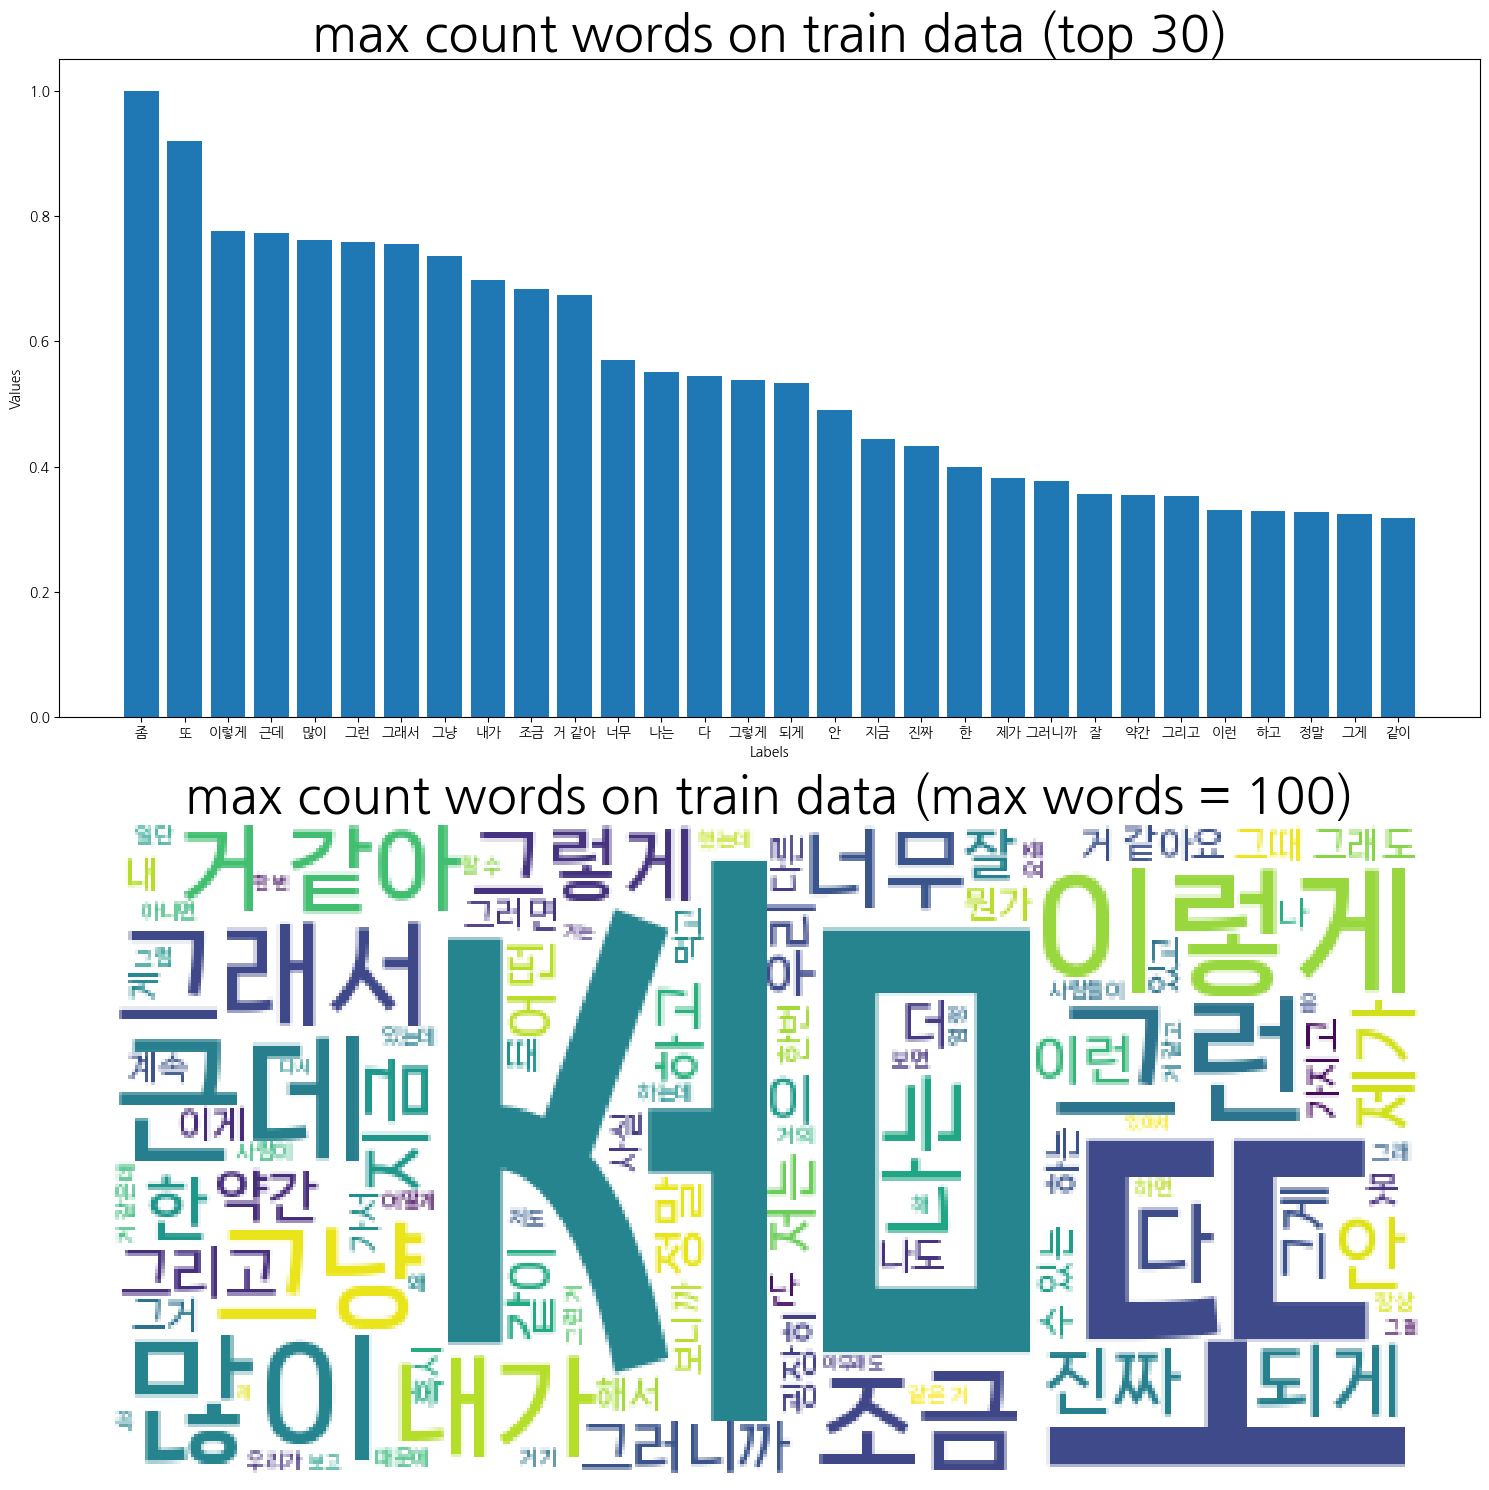

In [13]:
utterance_length = []
make_cloud(make_clean_data("/mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/resource/data/train.json", is_train=True), "train", 30)

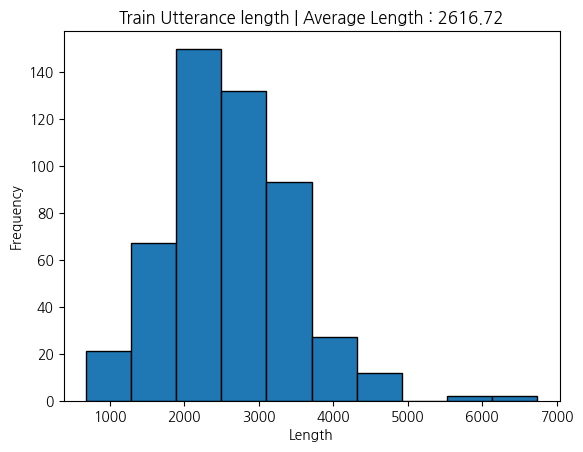

In [14]:
# 히스토그램 그리기
plt.hist(utterance_length, bins=10, edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title(f'Train Utterance length | Average Length : {np.array(utterance_length).mean():.2f}')
plt.show()

100%|██████████| 102/102 [00:00<00:00, 2056.47it/s]


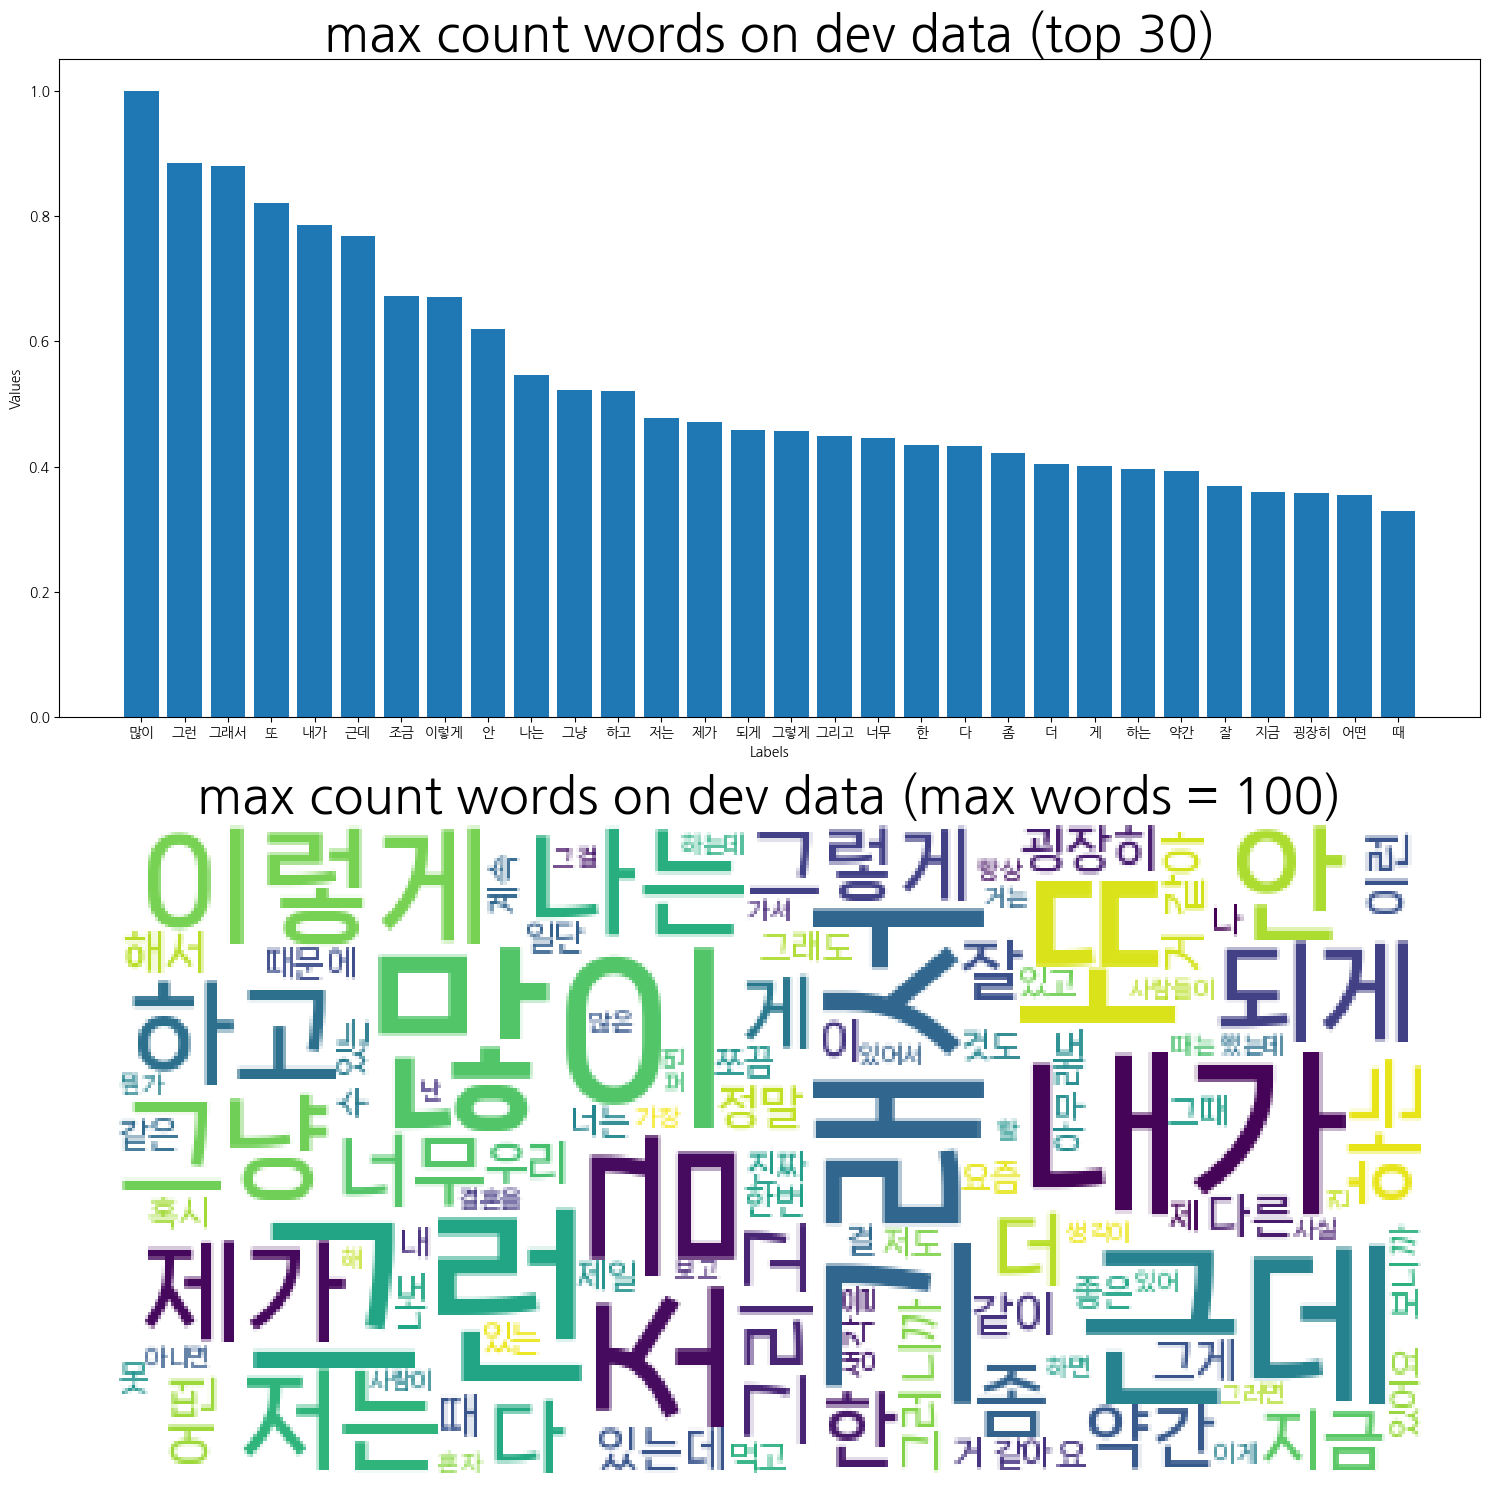

In [15]:
utterance_length = []
make_cloud(make_clean_data("/mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/resource/data/dev.json"), "dev", 30)

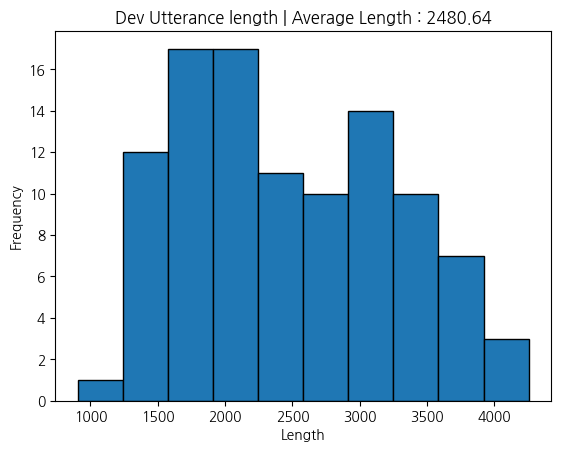

In [16]:
# 히스토그램 그리기
plt.hist(utterance_length, bins=10, edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title(f'Dev Utterance length | Average Length : {np.array(utterance_length).mean():.2f}')
plt.show()

100%|██████████| 408/408 [00:00<00:00, 2328.60it/s]


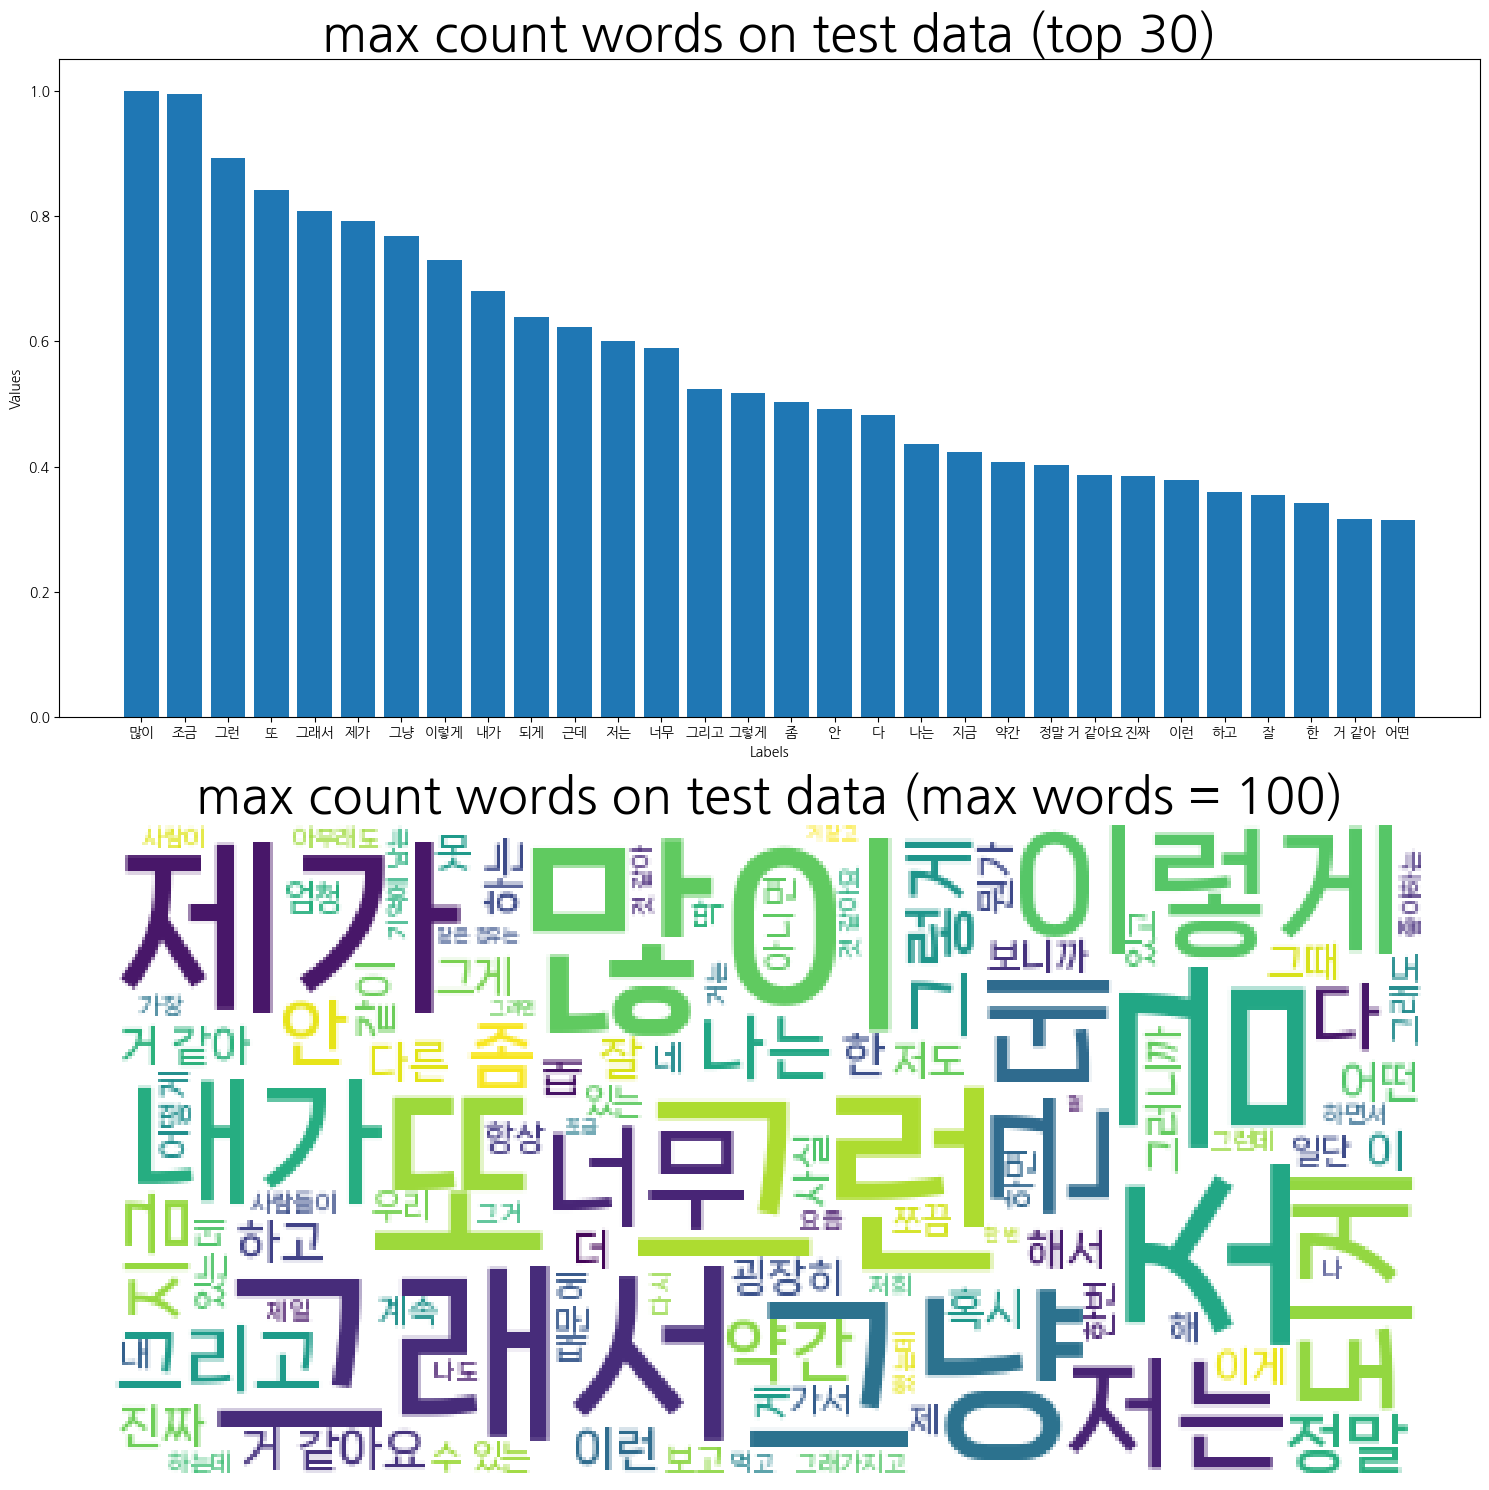

In [17]:
utterance_length = []
make_cloud(make_clean_data("/mnt/c/Users/hwyew/Downloads/korean_dialogue/korean_dialog/resource/data/test.json"), "test", 30)

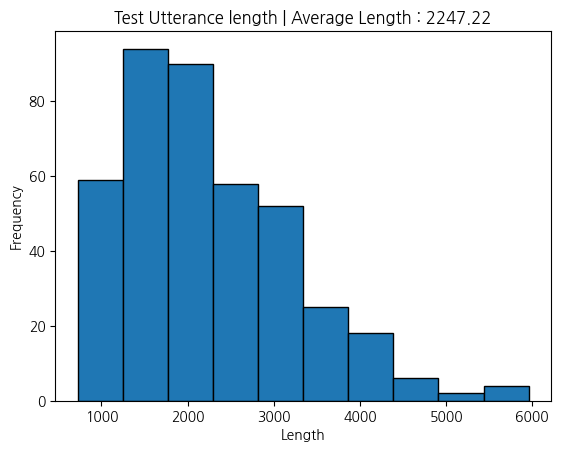

In [18]:
# 히스토그램 그리기
plt.hist(utterance_length, bins=10, edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title(f'Test Utterance length | Average Length : {np.array(utterance_length).mean():.2f}')
plt.show()